In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
from src.datasets.loading import statcan, ookla

In [3]:
import folium
import seaborn as sns

In [4]:
ookla_tiles = ookla.canada_tiles()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [5]:
# all_labels=pd.read_csv(r'home/ubuntu/ookla-statcan-analysis-t2/data/ookla-canada-tiles/ookla-canada-2020-Q4-fixed-tiles.csv')
# all_labels.head()

In [6]:
ookla_tiles.head()

,quadkey,geometry
0,0302303331012303,"POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
1,0212122230130321,"POLYGON ((-122.75574 49.30364, -122.75024 49.3..."
2,0212120311013031,"POLYGON ((-121.14075 51.58390, -121.13525 51.5..."
3,0212102012132221,"POLYGON ((-122.77771 53.85901, -122.77222 53.8..."
4,0212122232013120,"POLYGON ((-122.89307 49.11703, -122.88757 49.1..."


In [7]:
ookla_tiles.shape

(640790, 2)

In [8]:
last_4_quarters = ookla.speed_data(ookla.available_files().loc[('fixed',2021,3):('fixed',2022,2)].path)

In [9]:
last_4_quarters

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter
0,212003102331113,8630,659,36,5,3,fixed,2021,3
1,213121302312313,64252,22859,72,3,2,fixed,2021,3
2,302231303123012,179499,108278,8,25,16,fixed,2021,3
3,302303331021312,190314,75560,8,113,25,fixed,2021,3
4,302231231303201,228151,18968,16,36,16,fixed,2021,3
...,...,...,...,...,...,...,...,...,...
190701,302312230212302,52531,19656,2,4,1,fixed,2022,2
190702,302311222021021,7517,6905,7,1,1,fixed,2022,2
190703,213120031002112,12572,2001,77,3,1,fixed,2022,2
190704,303200002223332,110033,72022,4,1,1,fixed,2022,2


In [10]:
ookla_data=ookla.speed_data(ookla.available_files().path)

In [11]:
ookla_data.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter
0,302303331012303,130704,26290,11,8,6,fixed,2019,1
1,212122230130321,100966,55007,8,118,23,fixed,2019,1
2,212120311013031,890,2432,362,5,2,fixed,2019,1
3,212102012132221,36347,11509,14,44,1,fixed,2019,1
4,212122232013120,59481,23797,10,45,13,fixed,2019,1


In [12]:
ookla_data.shape

(3466267, 9)

In [13]:
ookla_data['devices'].unique()

array([  6,  23,   2,   1,  13,   9,  21,   5,   4,  17,  36,   8,  30,
        20,  12,  14,   3,  25,  10,   7,  16,  15,  11,  18,  62,  26,
        95,  35,  24,  32,  42,  29, 210,  75,  39,  34, 111,  31,  47,
        19,  22,  27,  80,  69,  33,  44,  57,  37,  28,  46,  40,  50,
       252,  38,  78,  41, 306,  43,  55,  45,  53, 189,  70,  49, 308,
        68, 175,  59,  51, 144,  52, 180, 139, 148, 186, 244,  76,  86,
        64,  48, 155,  71,  85,  54,  92, 198,  91, 162,  58, 172, 151,
       103,  61, 160, 187, 106,  88, 127,  98,  63,  66, 145,  56,  97,
        81, 146, 101, 177, 193,  67,  72, 115, 124,  65, 207, 112, 113,
       179, 173, 204, 159, 110,  99, 118, 105, 163, 114, 221,  84, 185,
        93, 121, 141, 135, 166,  60, 129,  83, 154, 122, 131, 211, 164,
        79, 107,  73, 153,  89, 152, 108,  74,  87, 116, 191, 161, 147,
       102, 274, 216, 109,  90, 133, 263, 364,  82, 223, 230, 169, 168,
       281,  94, 212, 232, 376, 165, 117, 149, 190, 257, 132, 29

In [14]:
bins = [0, 49, 1000]
ookla_data['avg_d_mbps_bin']=pd.cut(ookla_data['avg_d_kbps']/1000, bins)
ookla_data['avg_d_mbps']=ookla_data['avg_d_kbps']/1000
ookla_data['avg_u_mbps']=ookla_data['avg_u_kbps']/1000
ookla_data.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter,avg_d_mbps_bin,avg_d_mbps,avg_u_mbps
0,302303331012303,130704,26290,11,8,6,fixed,2019,1,"(49, 1000]",130.704,26.290
1,212122230130321,100966,55007,8,118,23,fixed,2019,1,"(49, 1000]",100.966,55.007
2,212120311013031,890,2432,362,5,2,fixed,2019,1,"(0, 49]",0.890,2.432
3,212102012132221,36347,11509,14,44,1,fixed,2019,1,"(0, 49]",36.347,11.509
4,212122232013120,59481,23797,10,45,13,fixed,2019,1,"(49, 1000]",59.481,23.797


In [15]:
bins = [0, 9, 1000]
ookla_data['avg_u_mbps_bin']=pd.cut(ookla_data['avg_u_kbps']/1000, bins)
ookla_data.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter,avg_d_mbps_bin,avg_d_mbps,avg_u_mbps,avg_u_mbps_bin
0,302303331012303,130704,26290,11,8,6,fixed,2019,1,"(49, 1000]",130.704,26.290,"(9, 1000]"
1,212122230130321,100966,55007,8,118,23,fixed,2019,1,"(49, 1000]",100.966,55.007,"(9, 1000]"
2,212120311013031,890,2432,362,5,2,fixed,2019,1,"(0, 49]",0.890,2.432,"(0, 9]"
3,212102012132221,36347,11509,14,44,1,fixed,2019,1,"(0, 49]",36.347,11.509,"(9, 1000]"
4,212122232013120,59481,23797,10,45,13,fixed,2019,1,"(49, 1000]",59.481,23.797,"(9, 1000]"


In [16]:
ookla_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3466267 entries, 0 to 52343
Data columns (total 13 columns):
 #   Column          Dtype   
---  ------          -----   
 0   quadkey         int64   
 1   avg_d_kbps      int64   
 2   avg_u_kbps      int64   
 3   avg_lat_ms      int64   
 4   tests           int64   
 5   devices         int64   
 6   conn_type       object  
 7   year            int64   
 8   quarter         int64   
 9   avg_d_mbps_bin  category
 10  avg_d_mbps      float64 
 11  avg_u_mbps      float64 
 12  avg_u_mbps_bin  category
dtypes: category(2), float64(2), int64(8), object(1)
memory usage: 324.0+ MB


In [17]:
ookla_tiles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 640790 entries, 0 to 640789
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   quadkey   640790 non-null  object  
 1   geometry  640790 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 9.8+ MB


In [18]:
ookla_tiles["quadkey"]= ookla_tiles["quadkey"].astype(int)

In [19]:
ookla_tiles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 640790 entries, 0 to 640789
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   quadkey   640790 non-null  int64   
 1   geometry  640790 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 9.8 MB


In [20]:
# df=df.sort_values('pct_change_bin')

# sns.set_palette("rainbow")

# fig, ax = plt.subplots(figsize=(20,15))
# ax.set_title('2017 geographical distribution of the houses coloured by annual percent change')
# sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2017], hue = 'pct_change_bin', ax=ax ,alpha=0.7)

In [21]:
ookla_merge=ookla_data.merge(ookla_tiles, on='quadkey', how='outer')

In [22]:
ookla_merge.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter,avg_d_mbps_bin,avg_d_mbps,avg_u_mbps,avg_u_mbps_bin,geometry
0,302303331012303,130704,26290,11,8,6,fixed,2019,1,"(49, 1000]",130.704,26.290,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
1,302303331012303,155185,35459,12,23,5,fixed,2019,2,"(49, 1000]",155.185,35.459,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
2,302303331012303,49799,11468,15,60,12,fixed,2019,3,"(49, 1000]",49.799,11.468,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
3,302303331012303,55197,14922,14,27,13,fixed,2019,4,"(49, 1000]",55.197,14.922,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
4,302303331012303,73777,12470,14,20,10,fixed,2020,1,"(49, 1000]",73.777,12.470,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."


In [23]:
ookla_merge.isnull().sum()

quadkey           0
avg_d_kbps        0
avg_u_kbps        0
avg_lat_ms        0
tests             0
devices           0
conn_type         0
year              0
quarter           0
avg_d_mbps_bin    9
avg_d_mbps        0
avg_u_mbps        0
avg_u_mbps_bin    1
geometry          0
dtype: int64

In [24]:
ookla_merge.dropna()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter,avg_d_mbps_bin,avg_d_mbps,avg_u_mbps,avg_u_mbps_bin,geometry
0,302303331012303,130704,26290,11,8,6,fixed,2019,1,"(49, 1000]",130.704,26.290,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
1,302303331012303,155185,35459,12,23,5,fixed,2019,2,"(49, 1000]",155.185,35.459,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
2,302303331012303,49799,11468,15,60,12,fixed,2019,3,"(49, 1000]",49.799,11.468,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
3,302303331012303,55197,14922,14,27,13,fixed,2019,4,"(49, 1000]",55.197,14.922,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
4,302303331012303,73777,12470,14,20,10,fixed,2020,1,"(49, 1000]",73.777,12.470,"(9, 1000]","POLYGON ((-73.36121 45.53329, -73.35571 45.533..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466262,303301220300321,56804,48529,35,4,2,mobile,2022,3,"(49, 1000]",56.804,48.529,"(9, 1000]","POLYGON ((-53.23425 47.37603, -53.22876 47.376..."
3466263,303301221112323,175390,44981,33,32,2,mobile,2022,3,"(49, 1000]",175.390,44.981,"(9, 1000]","POLYGON ((-52.79480 47.46152, -52.78931 47.461..."
3466264,303301221332020,103433,9563,56,1,1,mobile,2022,3,"(49, 1000]",103.433,9.563,"(9, 1000]","POLYGON ((-52.82227 47.30158, -52.81677 47.301..."
3466265,303301223111010,4278,4315,95,1,1,mobile,2022,3,"(0, 49]",4.278,4.315,"(0, 9]","POLYGON ((-52.76733 47.27923, -52.76184 47.279..."


In [25]:
#ookla_merge.plot()

In [26]:
ookla_data['conn_type'].unique()

array(['fixed', 'mobile'], dtype=object)

In [27]:
ookla_data.isnull().sum()

quadkey           0
avg_d_kbps        0
avg_u_kbps        0
avg_lat_ms        0
tests             0
devices           0
conn_type         0
year              0
quarter           0
avg_d_mbps_bin    9
avg_d_mbps        0
avg_u_mbps        0
avg_u_mbps_bin    1
dtype: int64

In [28]:
# quarters = [1,2,3,4]
# years = [2019, 2020, 2021, 2022]
# save_dir = 'images_for_gif'

In [29]:
# for year in years:
#     for quarter in quarters:
#         try:
#             speed_tiles = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==quarter) & (s.year==year)]
#             census_divs_speeds = statcan.boundary('census_divisions').to_crs('epsg:4326').sjoin(speed_tiles, how='left')
#             divs_pops = statcan.census_divisions_populations()
#             divs_pops.DAPOP = pd.to_numeric(divs_pops.DAPOP, errors='coerce') #certain subdivisions have data flags instead of values
#             census_speeds_agg = (census_divs_speeds.groupby('CDUID')['avg_d_kbps'].mean()/1000).rename('avg_d_mpbs')
#             statcan.boundary('census_divisions').merge(census_speeds_agg, left_on="CDUID", right_index=True).plot(column='avg_d_mpbs', 
#                                                                                                                   vmin = 0,
#                                                                                                                   vmax = 200,
#                                                                                                                   legend=True)
#             plt.gcf().suptitle(str(year) + ' Q' + str(quarter) + " Census Divisions Average Download Speeds (Mbps)")
#             plt.gca().set(xlabel="Easting (m)", ylabel="Northing (m)")
#             plt.savefig(save_dir + '/' + str(year) + '_' + str(quarter) + '_' + 'avg_download_speeds_canada.png')
#         except Exception as e:
#             continue

In [30]:
# world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [31]:
# world.info()

In [32]:
# world.plot()

In [33]:
ookla_merge19Q1 = ookla_merge.loc[(ookla_merge['year']==2019) & (ookla_merge['quarter']==1)] 
ookla_merge19Q2 = ookla_merge.loc[(ookla_merge['year']==2019) & (ookla_merge['quarter']==2)] 
ookla_merge19Q3 = ookla_merge.loc[(ookla_merge['year']==2019) & (ookla_merge['quarter']==3)] 
ookla_merge19Q4 = ookla_merge.loc[(ookla_merge['year']==2019) & (ookla_merge['quarter']==4)]
ookla_merge20Q1 = ookla_merge.loc[(ookla_merge['year']==2020) & (ookla_merge['quarter']==1)] 
ookla_merge20Q2 = ookla_merge.loc[(ookla_merge['year']==2020) & (ookla_merge['quarter']==2)]
ookla_merge20Q3 = ookla_merge.loc[(ookla_merge['year']==2020) & (ookla_merge['quarter']==3)]
ookla_merge20Q4 = ookla_merge.loc[(ookla_merge['year']==2020) & (ookla_merge['quarter']==4)]
ookla_merge21Q1 = ookla_merge.loc[(ookla_merge['year']==2021) & (ookla_merge['quarter']==1)] 
ookla_merge21Q2 = ookla_merge.loc[(ookla_merge['year']==2021) & (ookla_merge['quarter']==2)]
ookla_merge21Q3 = ookla_merge.loc[(ookla_merge['year']==2021) & (ookla_merge['quarter']==3)]
ookla_merge21Q4 = ookla_merge.loc[(ookla_merge['year']==2021) & (ookla_merge['quarter']==4)] 
ookla_merge22Q1 = ookla_merge.loc[(ookla_merge['year']==2022) & (ookla_merge['quarter']==1)] 
ookla_merge22Q2 = ookla_merge.loc[(ookla_merge['year']==2022) & (ookla_merge['quarter']==2)]
ookla_merge22Q3 = ookla_merge.loc[(ookla_merge['year']==2022) & (ookla_merge['quarter']==3)] 
ookla_merge22Q4 = ookla_merge.loc[(ookla_merge['year']==2022) & (ookla_merge['quarter']==4)] 

In [34]:
# quarters = [1,2,3,4]
# years = [2019, 2020, 2021, 2022]
# for year in years:
#     for quarter in quarters:
#         ookla_merge =ookla_merge.loc[(ookla_merge['year']==year) & (ookla_merge['quarter']==quarter)] 

In [35]:
# fig, ax = plt.subplots()
# (ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1)).plot(ax=ax, kind='bar')
# plt.xlabel('Average download speed in mbps')
# plt.ylabel('Percentage of population')

In [36]:
# # Some example data to display
# import numpy as np
# x = np.linspace(0, 2 * np.pi, 400)
# y = np.sin(x ** 2)
# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1), kind='bar')
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# plt.figure(figsize=(20,8))
# ookla_d=ookla_merge[['avg_d_kbps_bin','year']].groupby(['quarter'],as_index=False).mean()
# g=sns.barplot(x='Age',y='Survived',data=avg_survival_byage,color="LightSeaGreen")
# plt.show()

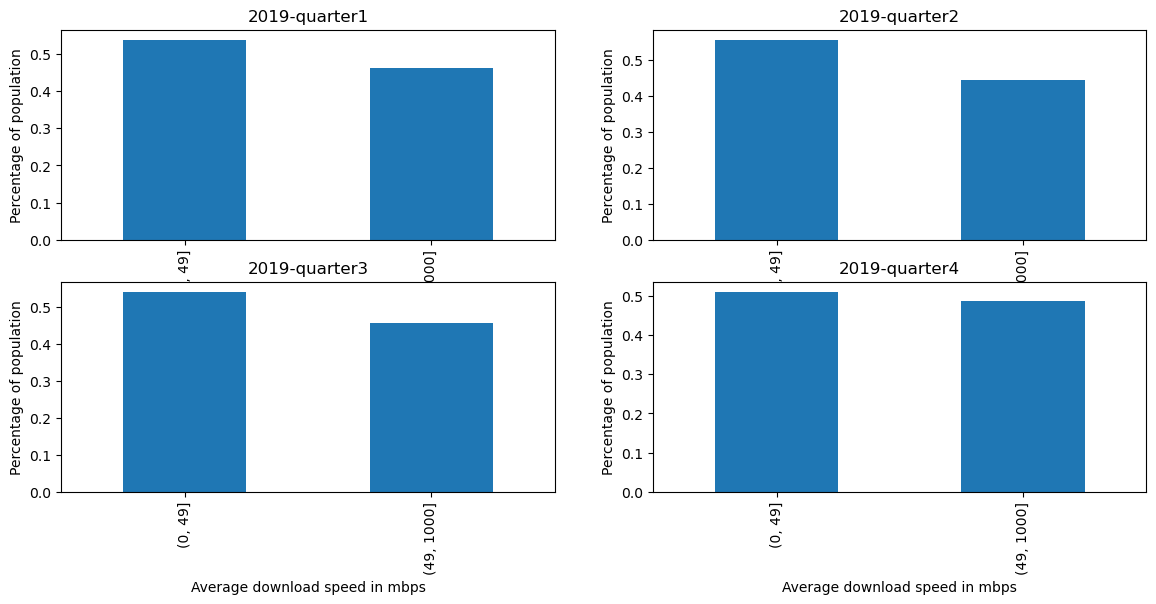

In [37]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
(ookla_merge19Q1['avg_d_mbps_bin'].value_counts()/len(ookla_merge19Q1)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar( ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2019-quarter1')

ax = f.add_subplot(222)
(ookla_merge19Q2['avg_d_mbps_bin'].value_counts()/len(ookla_merge19Q2)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar(ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2019-quarter2')

ax = f.add_subplot(223)
(ookla_merge19Q3['avg_d_mbps_bin'].value_counts()/len(ookla_merge19Q3)).plot(ax=ax, kind='bar')
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2019-quarter3')

ax = f.add_subplot(224)
(ookla_merge19Q4['avg_d_mbps_bin'].value_counts()/len(ookla_merge19Q4)).plot(ax=ax, kind='bar')
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2019-quarter4')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, '2020-quarter4')

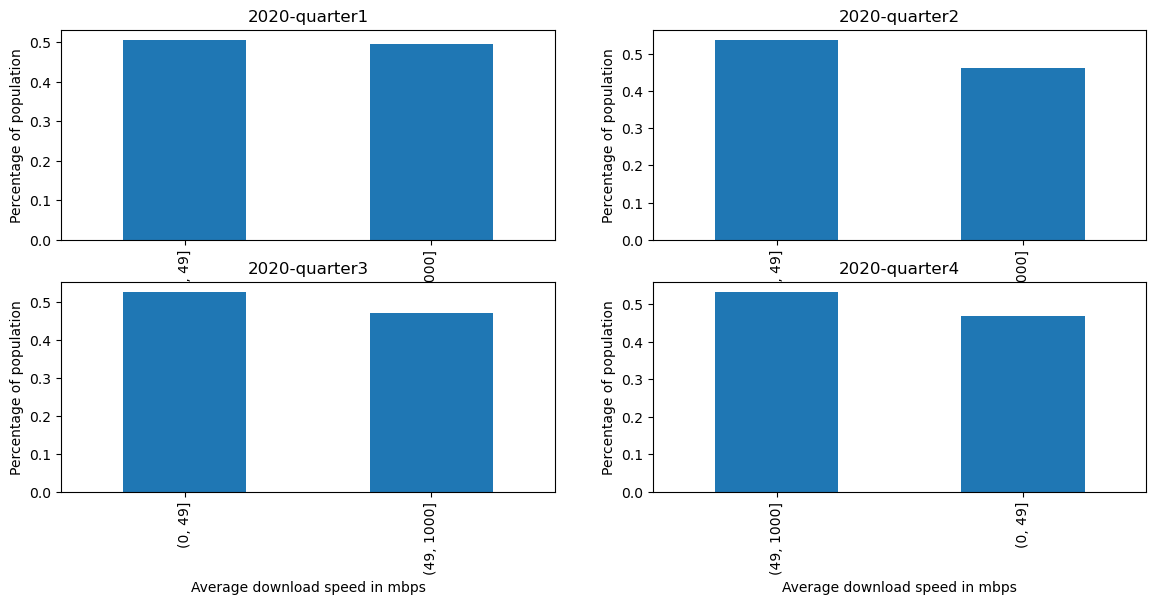

In [38]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
(ookla_merge20Q1['avg_d_mbps_bin'].value_counts()/len(ookla_merge20Q1)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar( ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2020-quarter1')

ax = f.add_subplot(222)
(ookla_merge20Q2['avg_d_mbps_bin'].value_counts()/len(ookla_merge20Q2)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar(ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2020-quarter2')

ax = f.add_subplot(223)
(ookla_merge20Q3['avg_d_mbps_bin'].value_counts()/len(ookla_merge20Q3)).plot(ax=ax, kind='bar')
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2020-quarter3')

ax = f.add_subplot(224)
(ookla_merge20Q4['avg_d_mbps_bin'].value_counts()/len(ookla_merge20Q4)).plot(ax=ax, kind='bar')
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2020-quarter4')

Text(0.5, 1.0, '2021-quarter4')

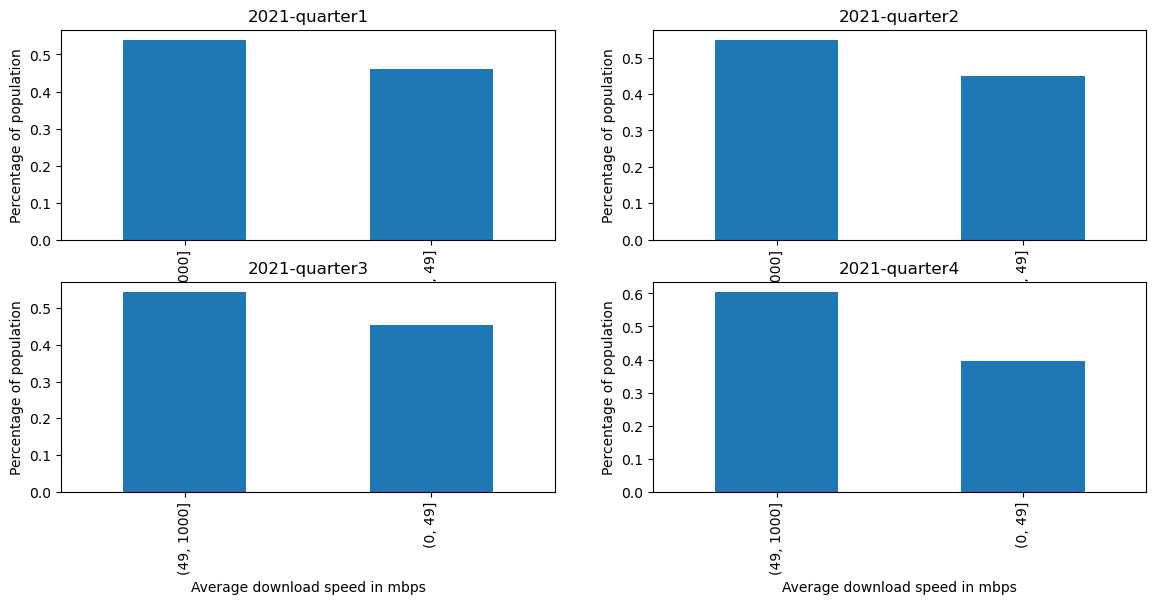

In [39]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
(ookla_merge21Q1['avg_d_mbps_bin'].value_counts()/len(ookla_merge21Q1)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar( ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2021-quarter1')

ax = f.add_subplot(222)
(ookla_merge21Q2['avg_d_mbps_bin'].value_counts()/len(ookla_merge21Q2)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar(ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2021-quarter2')

ax = f.add_subplot(223)
(ookla_merge21Q3['avg_d_mbps_bin'].value_counts()/len(ookla_merge21Q3)).plot(ax=ax, kind='bar')
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2021-quarter3')

ax = f.add_subplot(224)
(ookla_merge21Q4['avg_d_mbps_bin'].value_counts()/len(ookla_merge21Q4)).plot(ax=ax, kind='bar')
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2021-quarter4')

Text(0.5, 1.0, '2022-quarter3')

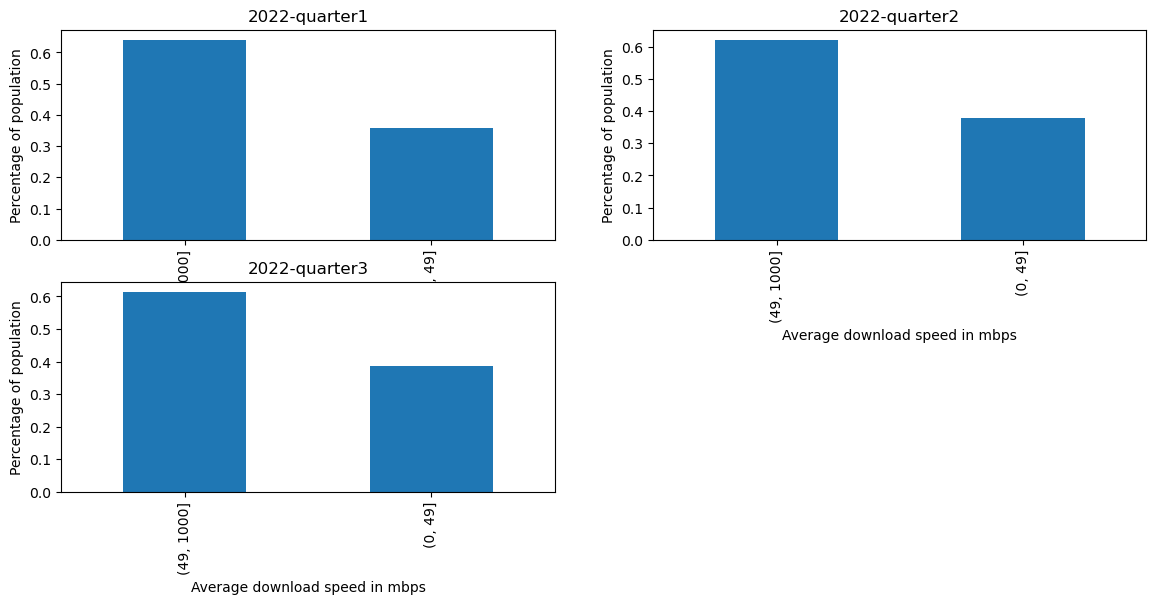

In [40]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
(ookla_merge22Q1['avg_d_mbps_bin'].value_counts()/len(ookla_merge22Q1)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar( ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2022-quarter1')

ax = f.add_subplot(222)
(ookla_merge22Q2['avg_d_mbps_bin'].value_counts()/len(ookla_merge22Q2)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar(ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2022-quarter2')

ax = f.add_subplot(223)
(ookla_merge22Q3['avg_d_mbps_bin'].value_counts()/len(ookla_merge22Q3)).plot(ax=ax, kind='bar')
plt.xlabel('Average download speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2022-quarter3')

# ax = f.add_subplot(224)
# (ookla_merge22Q4['avg_d_kbps_bin'].value_counts()/len(ookla_merge22Q4)).plot(ax=ax, kind='bar')
# plt.xlabel('Average download speed in mbps')
# plt.ylabel('Percentage of population')
# ax.set_title('2022-quarter4')

Text(0.5, 1.0, '2019-quarter4')

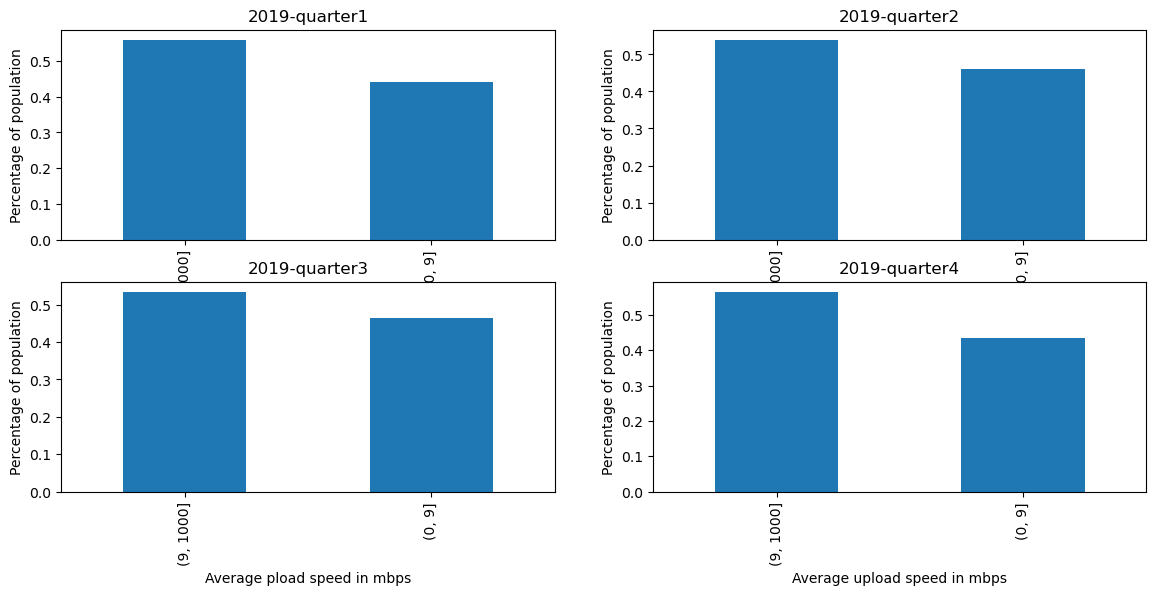

In [41]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
(ookla_merge19Q1['avg_u_mbps_bin'].value_counts()/len(ookla_merge19Q1)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar( ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2019-quarter1')

ax = f.add_subplot(222)
(ookla_merge19Q2['avg_u_mbps_bin'].value_counts()/len(ookla_merge19Q2)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar(ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2019-quarter2')

ax = f.add_subplot(223)
(ookla_merge19Q3['avg_u_mbps_bin'].value_counts()/len(ookla_merge19Q3)).plot(ax=ax, kind='bar')
plt.xlabel('Average pload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2019-quarter3')

ax = f.add_subplot(224)
(ookla_merge19Q4['avg_u_mbps_bin'].value_counts()/len(ookla_merge19Q4)).plot(ax=ax, kind='bar')
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2019-quarter4')

Text(0.5, 1.0, '2020-quarter4')

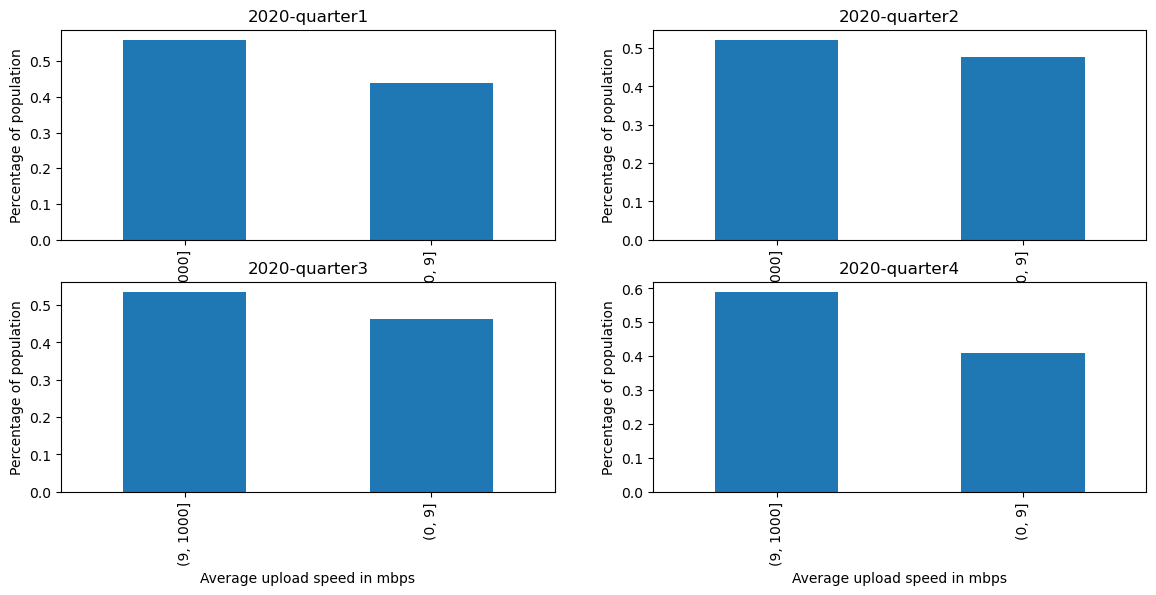

In [42]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
(ookla_merge20Q1['avg_u_mbps_bin'].value_counts()/len(ookla_merge20Q1)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar( ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2020-quarter1')

ax = f.add_subplot(222)
(ookla_merge20Q2['avg_u_mbps_bin'].value_counts()/len(ookla_merge20Q2)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar(ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2020-quarter2')

ax = f.add_subplot(223)
(ookla_merge20Q3['avg_u_mbps_bin'].value_counts()/len(ookla_merge20Q3)).plot(ax=ax, kind='bar')
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2020-quarter3')

ax = f.add_subplot(224)
(ookla_merge20Q4['avg_u_mbps_bin'].value_counts()/len(ookla_merge20Q4)).plot(ax=ax, kind='bar')
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2020-quarter4')

Text(0.5, 1.0, '2021-quarter4')

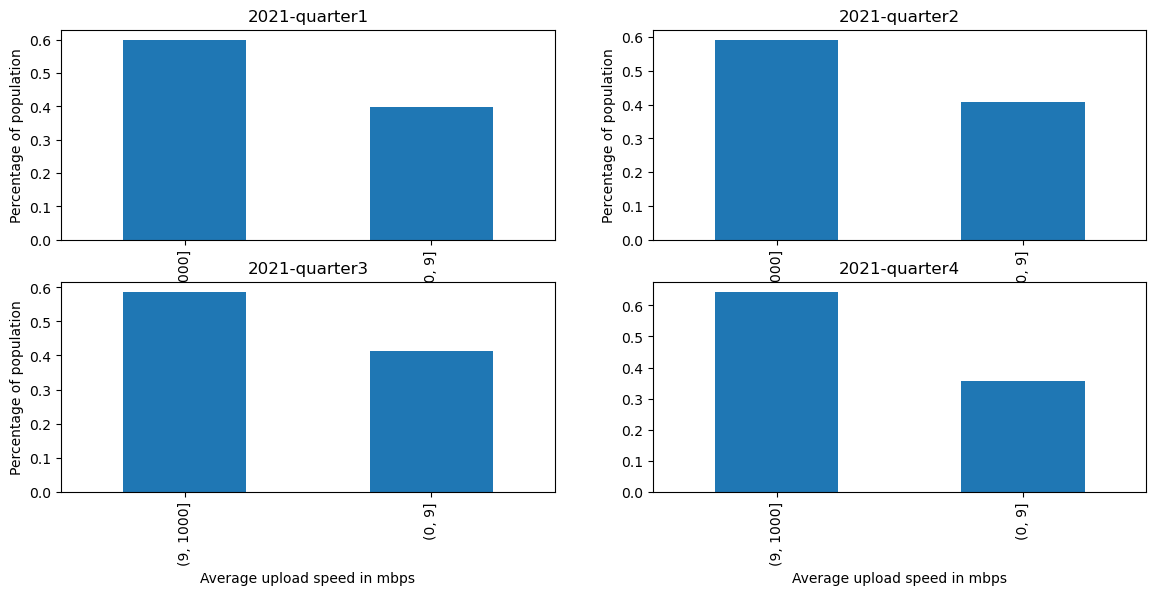

In [43]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
(ookla_merge21Q1['avg_u_mbps_bin'].value_counts()/len(ookla_merge21Q1)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar( ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2021-quarter1')

ax = f.add_subplot(222)
(ookla_merge21Q2['avg_u_mbps_bin'].value_counts()/len(ookla_merge21Q2)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar(ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2021-quarter2')

ax = f.add_subplot(223)
(ookla_merge21Q3['avg_u_mbps_bin'].value_counts()/len(ookla_merge21Q3)).plot(ax=ax, kind='bar')
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2021-quarter3')

ax = f.add_subplot(224)
(ookla_merge21Q4['avg_u_mbps_bin'].value_counts()/len(ookla_merge21Q4)).plot(ax=ax, kind='bar')
plt.xlabel('Average download speed in mbps')
plt.xlabel('Average upload speed in mbps')
ax.set_title('2021-quarter4')

Text(0.5, 1.0, '2022-quarter3')

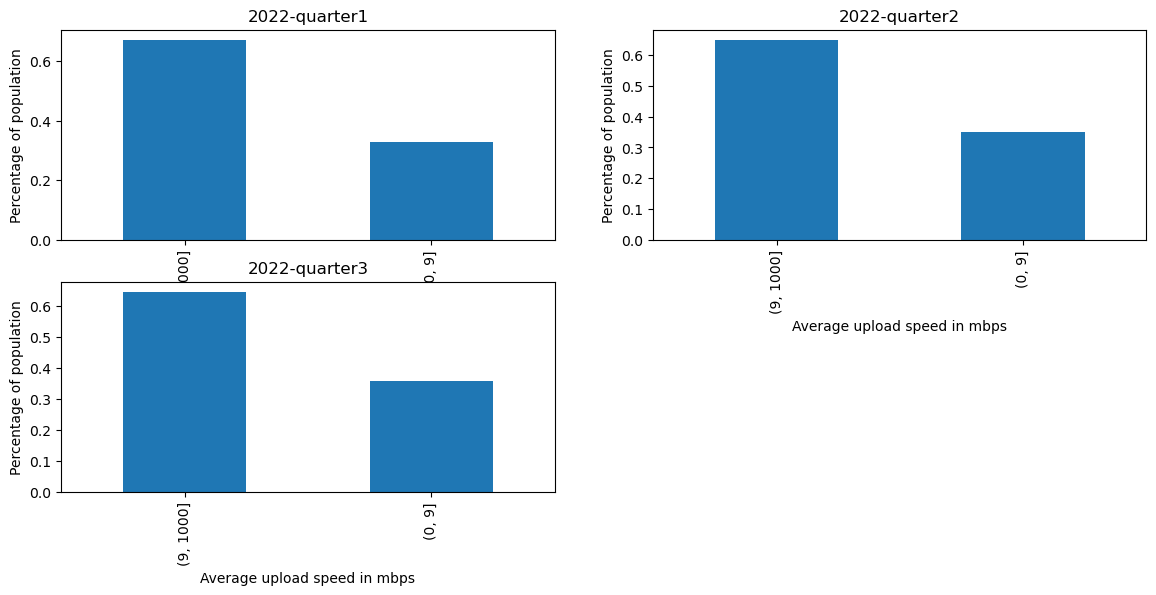

In [44]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(221)
(ookla_merge22Q1['avg_u_mbps_bin'].value_counts()/len(ookla_merge22Q1)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar( ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2022-quarter1')

ax = f.add_subplot(222)
(ookla_merge22Q2['avg_u_mbps_bin'].value_counts()/len(ookla_merge22Q2)).plot(ax=ax, kind='bar')
#plt.hist(ookla_merge19Q1['avg_d_kbps_bin'])
#plt.bar(ookla_merge19Q1['avg_d_kbps_bin'].unique(),ookla_merge19Q1['avg_d_kbps_bin'].value_counts()/len(ookla_merge19Q1))
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2022-quarter2')

ax = f.add_subplot(223)
(ookla_merge22Q3['avg_u_mbps_bin'].value_counts()/len(ookla_merge22Q3)).plot(ax=ax, kind='bar')
plt.xlabel('Average upload speed in mbps')
plt.ylabel('Percentage of population')
ax.set_title('2022-quarter3')

# ax = f.add_subplot(224)
# (ookla_merge22Q4['avg_d_kbps_bin'].value_counts()/len(ookla_merge22Q4)).plot(ax=ax, kind='bar')
# plt.xlabel('Average download speed in mbps')
# plt.ylabel('Percentage of population')
# ax.set_title('2022-quarter4')

/tmp/ipykernel_54/2843271162.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ookla_merge.groupby(['year','quarter']).mean()['avg_d_mbps'].unstack().plot(ax=ax,marker='o')


Text(0.5, 1.0, 'average download speed in mbps grouped by year ')

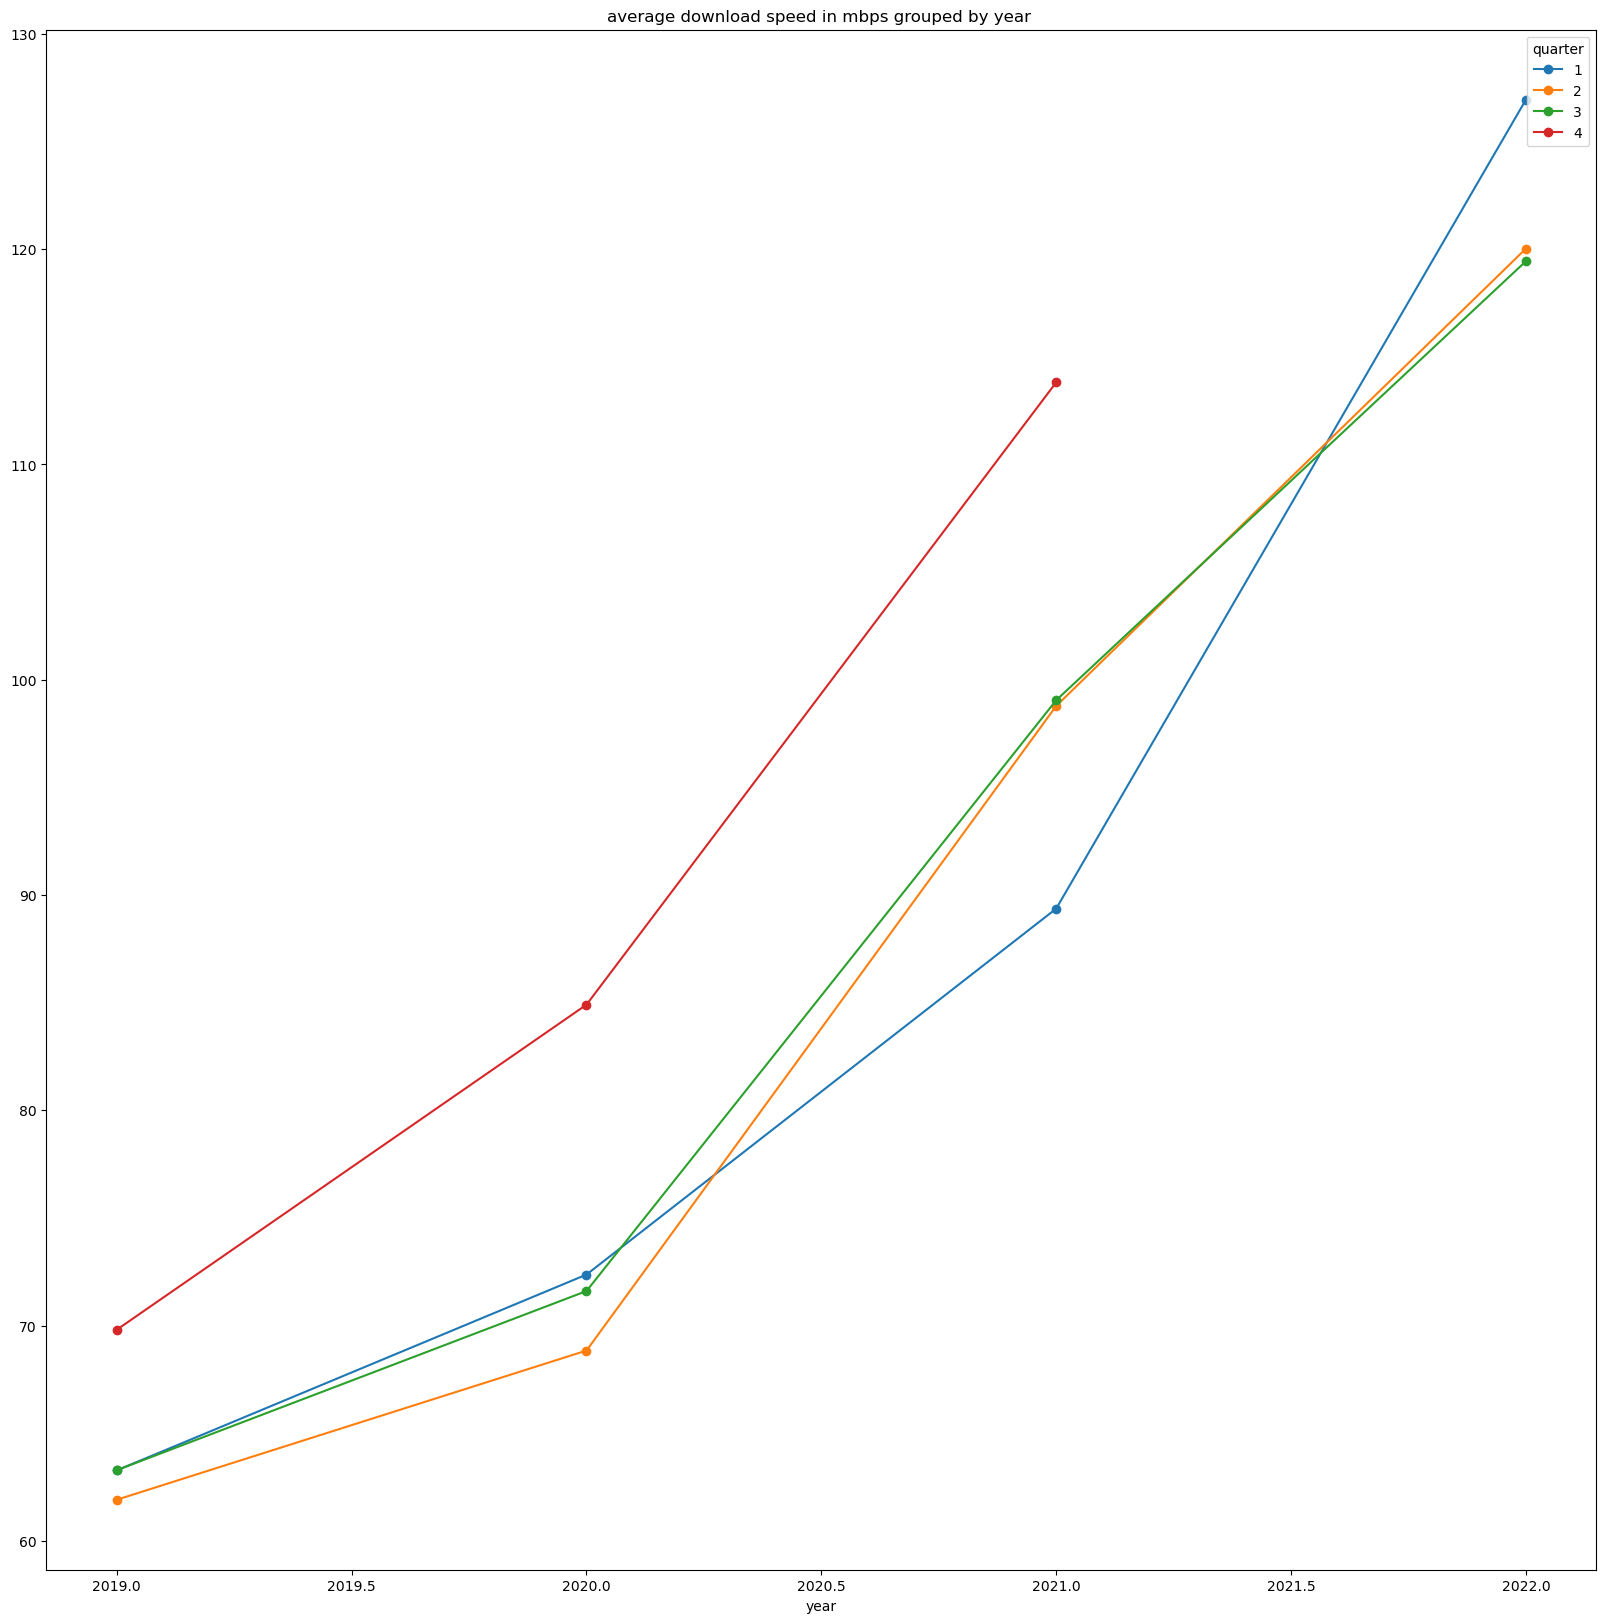

In [45]:
fig, ax = plt.subplots(figsize=(20,20))
# use unstack()
ookla_merge.groupby(['year','quarter']).mean()['avg_d_mbps'].unstack().plot(ax=ax,marker='o')
plt.title("average download speed in mbps grouped by year ") 


/tmp/ipykernel_54/1766754686.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ookla_merge.groupby(['year','quarter']).mean()['avg_u_mbps'].unstack().plot(ax=ax,marker='o')


Text(0.5, 1.0, 'average upload speed in kbps grouped by year ')

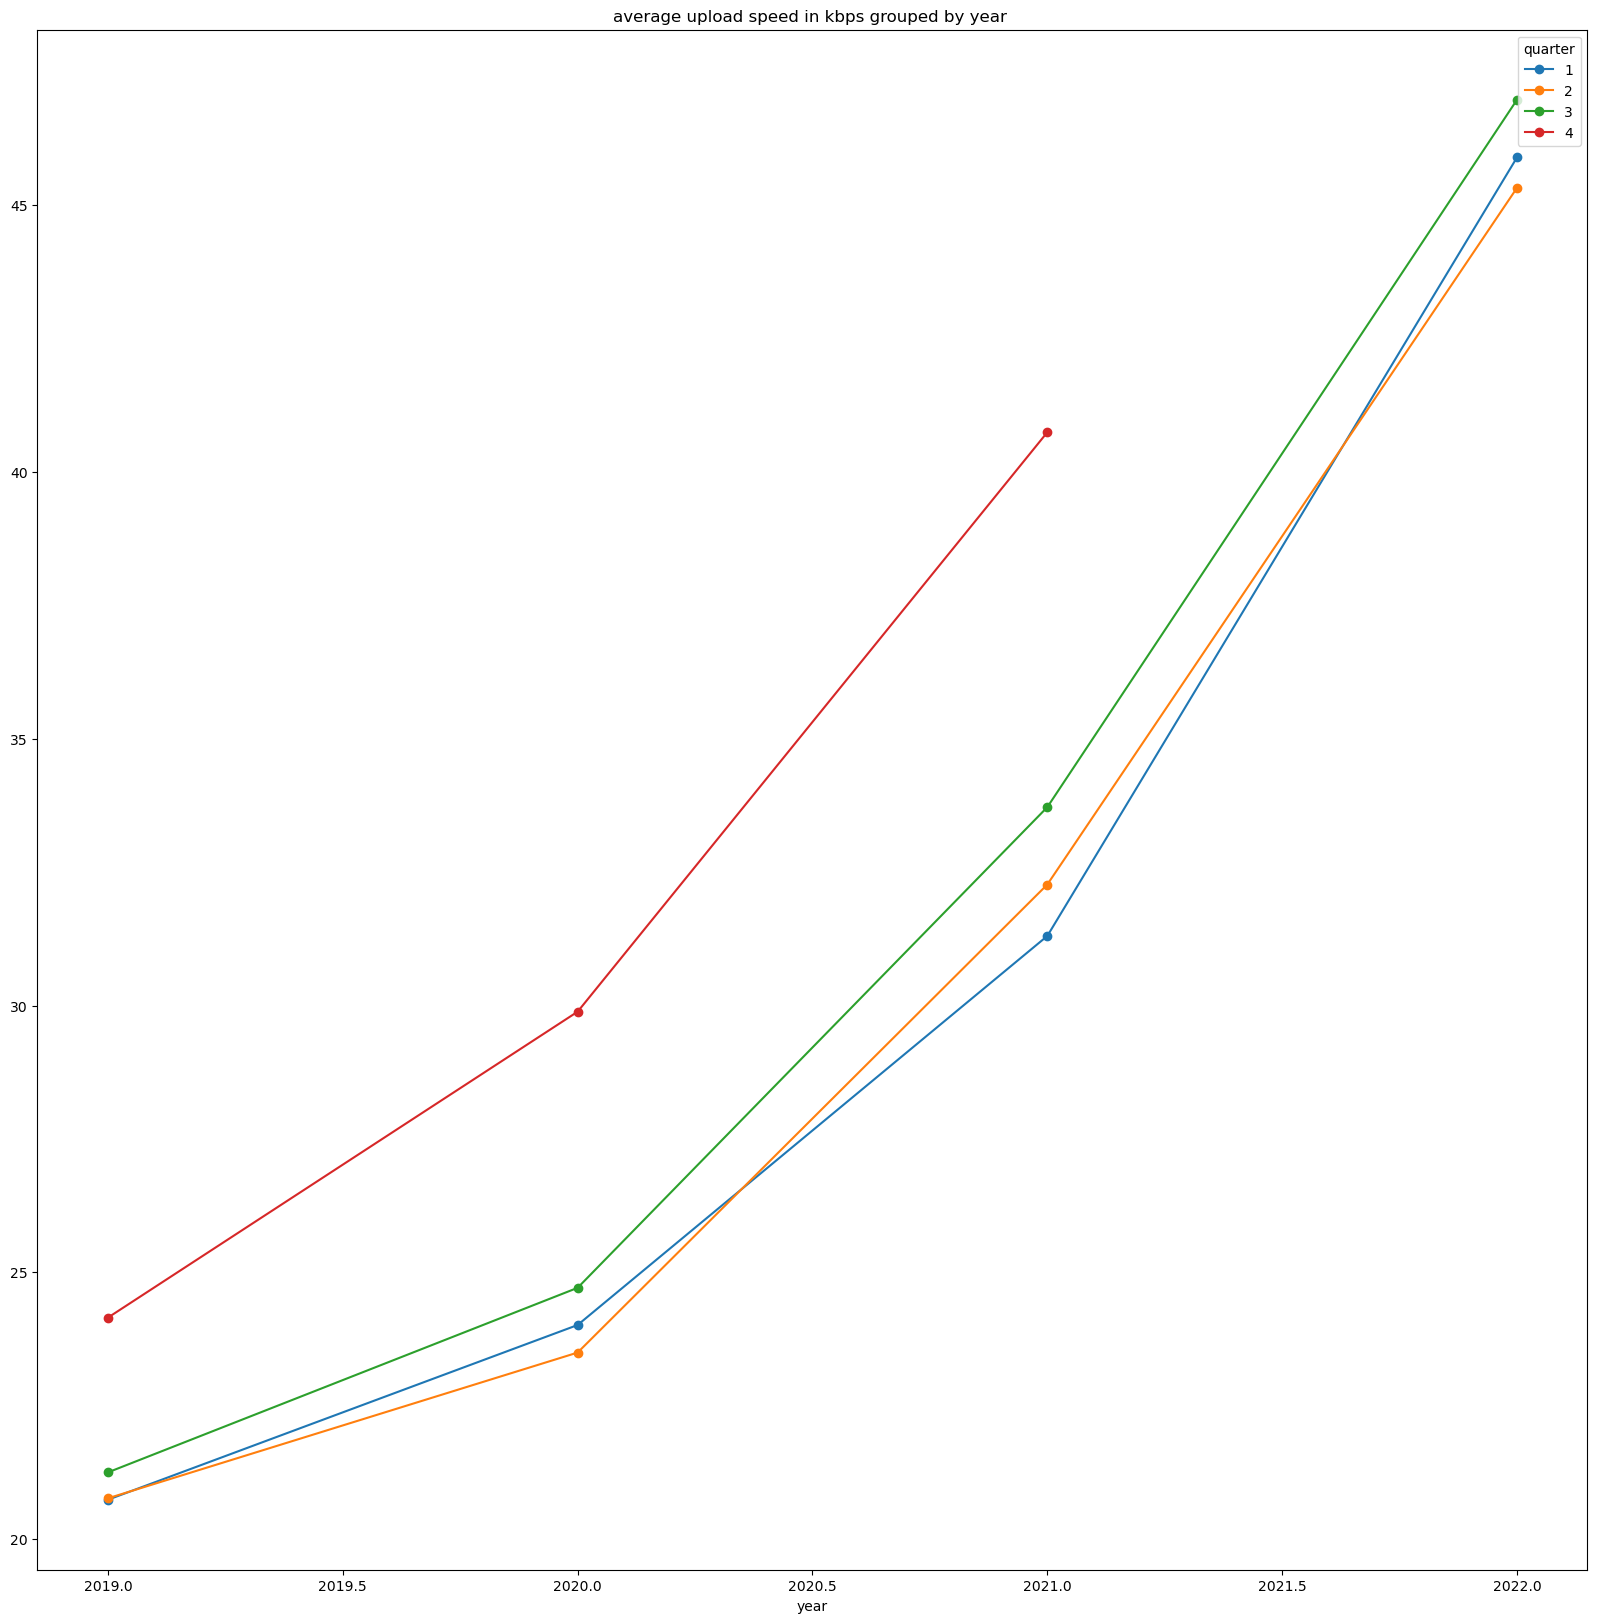

In [46]:
fig, ax = plt.subplots(figsize=(20,20))
# use unstack()
ookla_merge.groupby(['year','quarter']).mean()['avg_u_mbps'].unstack().plot(ax=ax,marker='o')
plt.title("average upload speed in kbps grouped by year ") 


In [47]:
ookla_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3466267 entries, 0 to 3466266
Data columns (total 14 columns):
 #   Column          Dtype   
---  ------          -----   
 0   quadkey         int64   
 1   avg_d_kbps      int64   
 2   avg_u_kbps      int64   
 3   avg_lat_ms      int64   
 4   tests           int64   
 5   devices         int64   
 6   conn_type       object  
 7   year            int64   
 8   quarter         int64   
 9   avg_d_mbps_bin  category
 10  avg_d_mbps      float64 
 11  avg_u_mbps      float64 
 12  avg_u_mbps_bin  category
 13  geometry        geometry
dtypes: category(2), float64(2), geometry(1), int64(8), object(1)
memory usage: 350.4+ MB


In [48]:
df2=ookla_merge


In [49]:
df2=df2.drop(['quadkey','geometry'],axis=1)
df2.head()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter,avg_d_mbps_bin,avg_d_mbps,avg_u_mbps,avg_u_mbps_bin
0,130704,26290,11,8,6,fixed,2019,1,"(49, 1000]",130.704,26.290,"(9, 1000]"
1,155185,35459,12,23,5,fixed,2019,2,"(49, 1000]",155.185,35.459,"(9, 1000]"
2,49799,11468,15,60,12,fixed,2019,3,"(49, 1000]",49.799,11.468,"(9, 1000]"
3,55197,14922,14,27,13,fixed,2019,4,"(49, 1000]",55.197,14.922,"(9, 1000]"
4,73777,12470,14,20,10,fixed,2020,1,"(49, 1000]",73.777,12.470,"(9, 1000]"


In [50]:
df2 = pd.get_dummies(df2, columns=["conn_type","avg_d_mbps_bin","avg_u_mbps_bin"])
df2.head()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,avg_d_mbps,avg_u_mbps,conn_type_fixed,conn_type_mobile,"avg_d_mbps_bin_(0, 49]","avg_d_mbps_bin_(49, 1000]","avg_u_mbps_bin_(0, 9]","avg_u_mbps_bin_(9, 1000]"
0,130704,26290,11,8,6,2019,1,130.704,26.290,1,0,0,1,0,1
1,155185,35459,12,23,5,2019,2,155.185,35.459,1,0,0,1,0,1
2,49799,11468,15,60,12,2019,3,49.799,11.468,1,0,0,1,0,1
3,55197,14922,14,27,13,2019,4,55.197,14.922,1,0,0,1,0,1
4,73777,12470,14,20,10,2020,1,73.777,12.470,1,0,0,1,0,1


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3466267 entries, 0 to 3466266
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   avg_d_kbps                 int64  
 1   avg_u_kbps                 int64  
 2   avg_lat_ms                 int64  
 3   tests                      int64  
 4   devices                    int64  
 5   year                       int64  
 6   quarter                    int64  
 7   avg_d_mbps                 float64
 8   avg_u_mbps                 float64
 9   conn_type_fixed            uint8  
 10  conn_type_mobile           uint8  
 11  avg_d_mbps_bin_(0, 49]     uint8  
 12  avg_d_mbps_bin_(49, 1000]  uint8  
 13  avg_u_mbps_bin_(0, 9]      uint8  
 14  avg_u_mbps_bin_(9, 1000]   uint8  
dtypes: float64(2), int64(7), uint8(6)
memory usage: 284.3 MB


In [52]:
df3=df2[["tests","devices","year","quarter","avg_d_mbps","avg_u_mbps","conn_type_fixed","conn_type_mobile","avg_lat_ms"]]

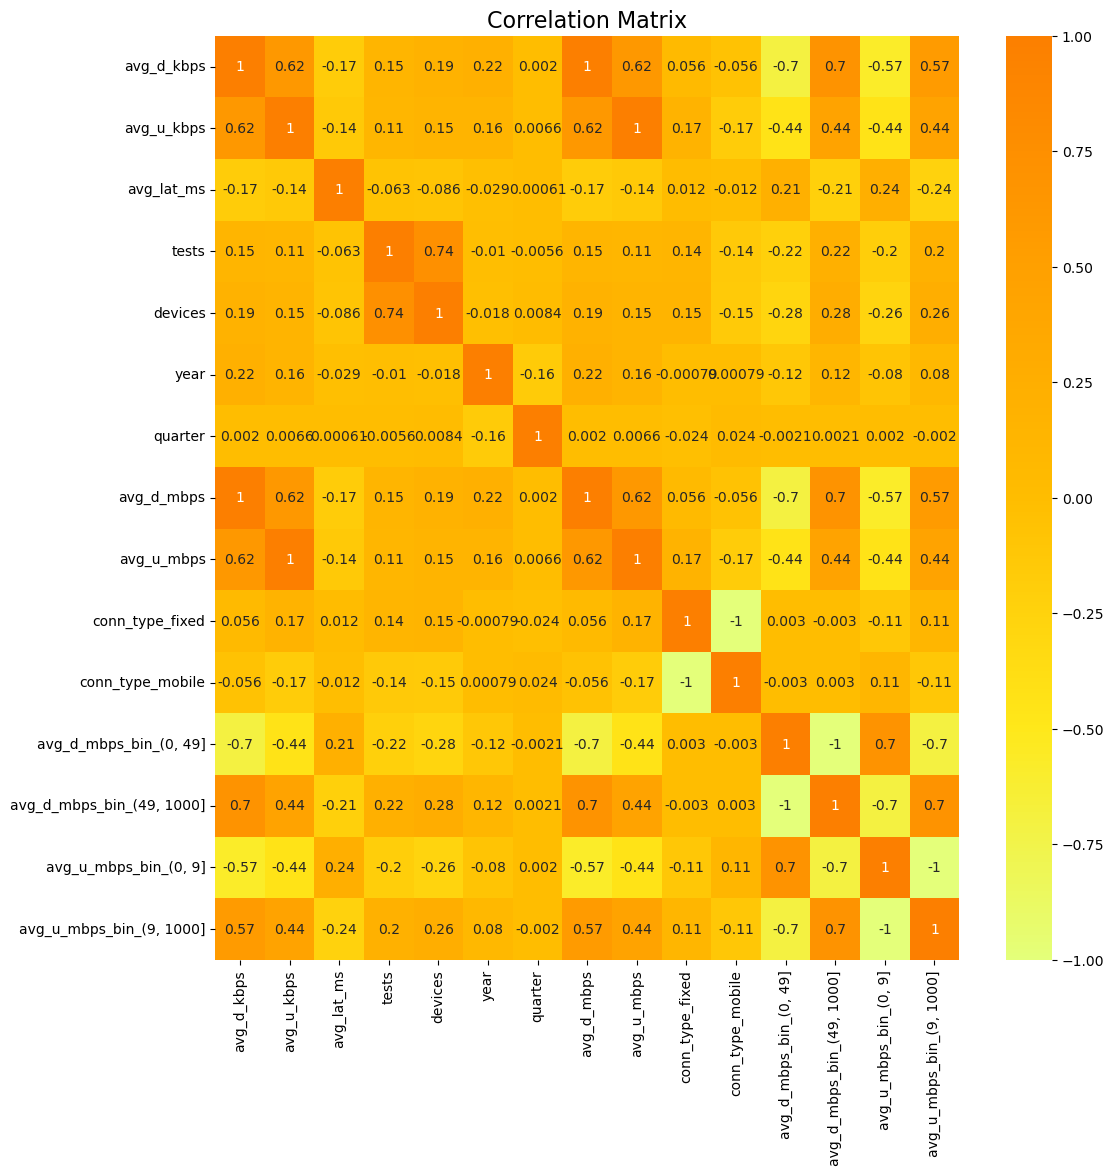

In [53]:
plt.figure(figsize=(12,12))
# correlation plot
corr = df2.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);
plt.title('Correlation Matrix', fontsize=16);

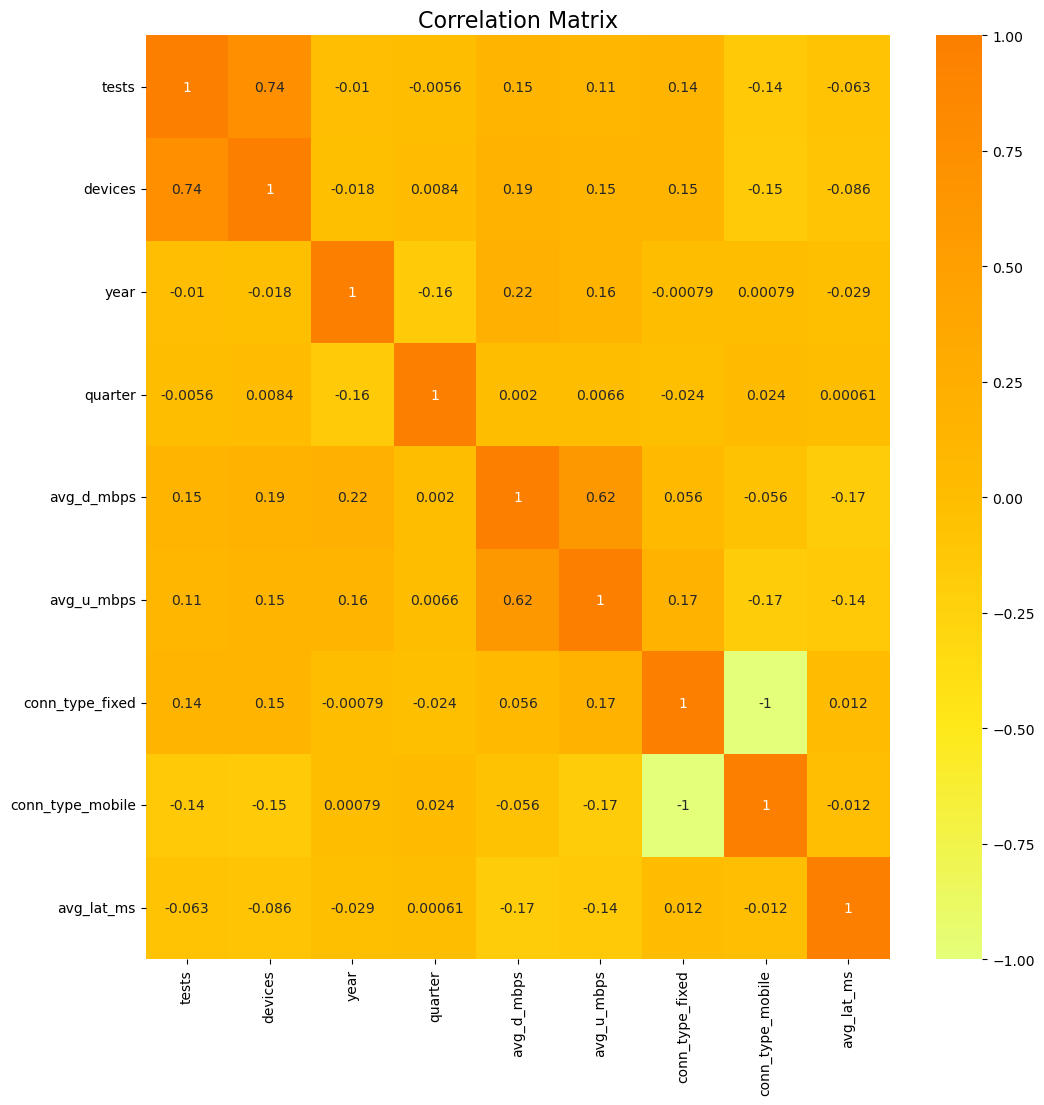

In [55]:
plt.figure(figsize=(12,12))
# correlation plot
corr = df3.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);
plt.title('Correlation Matrix', fontsize=16);

/tmp/ipykernel_90/2052333895.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ookla_merge.groupby(['year','conn_type']).mean()['avg_u_mbps'].unstack().plot(ax=ax,marker='o')


Text(0.5, 1.0, 'Average upload speed in mbps grouped by year ')

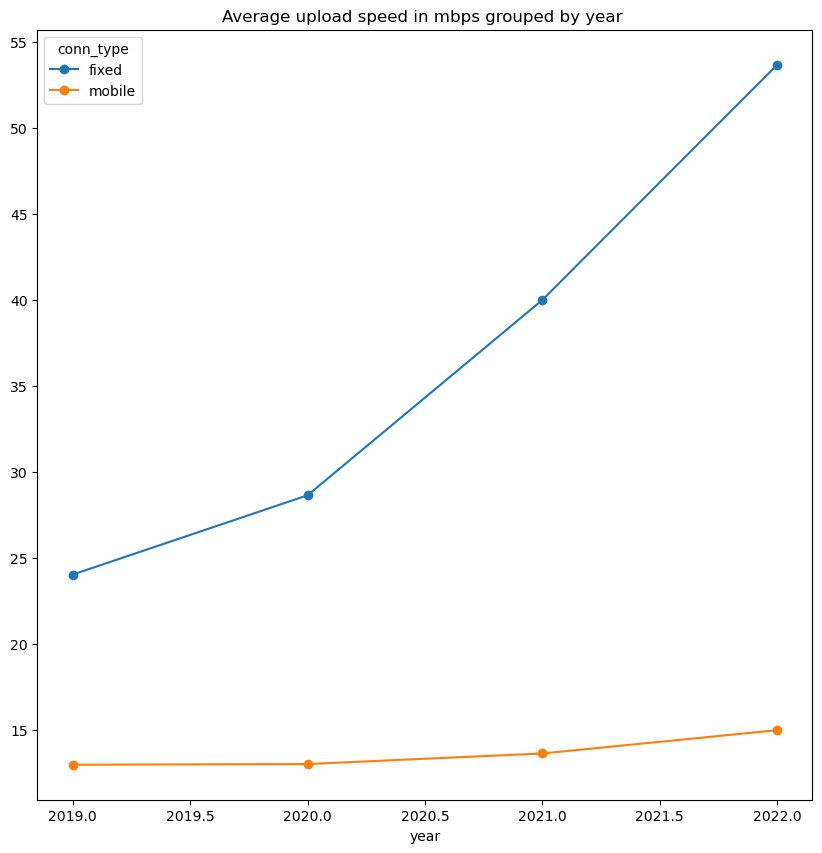

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
# use unstack()
ookla_merge.groupby(['year','conn_type']).mean()['avg_u_mbps'].unstack().plot(ax=ax,marker='o')
plt.title("Average upload speed in mbps grouped by year ") 


/tmp/ipykernel_90/128128223.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ookla_merge.groupby(['year','conn_type']).mean()['avg_d_mbps'].unstack().plot(ax=ax,marker='o')


Text(0.5, 1.0, 'Average download speed in kbps grouped by year ')

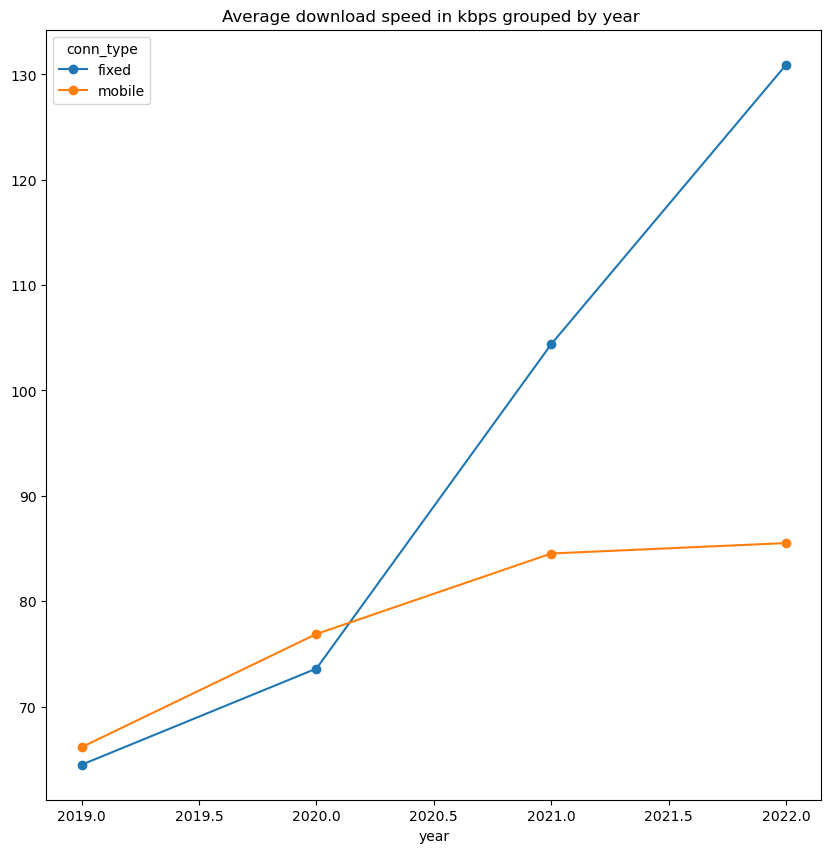

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
# use unstack()
ookla_merge.groupby(['year','conn_type']).mean()['avg_d_mbps'].unstack().plot(ax=ax,marker='o')
plt.title("Average download speed in kbps grouped by year ") 


In [56]:
quarters = [1,2,3,4]
years = [2019, 2020, 2021, 2022]

In [57]:
for year in years:
    for quarter in quarters:
        try:
            speed_tiles = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==quarter) & (s.year==year)]
            census_divs_speeds = statcan.boundary('census_divisions').to_crs('epsg:4326').sjoin(speed_tiles, how='left')
            divs_pops = statcan.census_divisions_populations()
            divs_pops.DAPOP = pd.to_numeric(divs_pops.DAPOP, errors='coerce') #certain subdivisions have data flags instead of values
            census_speeds_agg = (census_divs_speeds.groupby('CDUID')['avg_d_kbps'].mean()/1000).rename('avg_d_mpbs')
            statcan.boundary('census_divisions').merge(census_speeds_agg, left_on="CDUID", right_index=True).plot(column='avg_d_mpbs', 
                                                                                                                  vmin = 0,
                                                                                                                  vmax = 200,
                                                                                                                  legend=True)
            plt.gcf().suptitle(str(year) + ' Q' + str(quarter) + " Census Divisions Average Download Speeds (Mbps)")
            plt.gca().set(xlabel="Easting (m)", ylabel="Northing (m)")
            plt.savefig(save_dir + '/' + str(year) + '_' + str(quarter) + '_' + 'avg_download_speeds_canada.png')
        except Exception as e:
            continue